In [2]:
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
from barcode import Code128, Code39, EAN13
from barcode.writer import ImageWriter
import textwrap 
import re

csv = "../Order_Items_Export_-_2022-06-20.csv"
df = pd.read_csv(csv)
font = "../src/Kanit-Light.ttf"
df

,Product ID,Product Name,Line Item Quantity,Product SKU,Product Categories
0,7408,มะละกอดิบ (1000 กรัม),2,VB0190,ผัก
1,6953,มะกอกลาว (100 กรัม),5,VB1301,ผัก
2,6927,ผักบุ้งนา (100 กรัม),4,VB1021,ผัก
3,6841,ผักบุ้งจีน (100 กรัม),4,VB0051,ผัก
4,6874,ชะอม(กำใหญ่) (100 กรัม),9,VB0411,ผัก
...,...,...,...,...,...
275,8043,ขนมปังเนยโสด (155 กรัม),3,DTF1420,ขนม
276,6956,พริกลาว (100 กรัม),5,VB1341,ผัก
277,7794,เลือดไก่ (350 กรัม),5,IF0580,วัตถุดิบ
278,6864,พริกขี้หนูสวน (100 กรัม),5,VB0311,ผัก


In [2]:
def draw_multiple_line_text(image, text, font, text_color, text_start_height):
    '''
    From unutbu on [python PIL draw multiline text on image](https://stackoverflow.com/a/7698300/395857)
    '''
    draw = ImageDraw.Draw(image)
    image_width, image_height = image.size
    y_text = text_start_height
    lines = textwrap.wrap(text, width=40)
    for line in lines:
        line_width, line_height = font.getsize(line)
        draw.text(((image_width - line_width) / 2, y_text), 
                  line, font=font, fill=text_color)
        y_text += line_height

In [8]:
#1 W8
#Barcode_Copy

def createbarcode(sku):
    num_list = []
    for c in re.findall('[a-zA-Z]+',sku)[0]: num_list.append(str(ord(c)))
    str_to_num = "".join(num_list) + "".join(re.findall('[0-9]+',sku))
    i = 0
    while len(str_to_num) <13:
        str_to_num = f"{str_to_num}{i}"
        i+=1
    code = EAN13(str_to_num,writer=ImageWriter())
    code.save('Barcode_Copy')
    img = Image.open('Barcode_Copy.png')
    return img
    
c = 0
width = 5*151     #4cm
height = 5*114    #3cm
fonts = ImageFont.truetype(font, size=50)
fonts_weight = ImageFont.truetype(font, size=20)
fonts_sku = ImageFont.truetype(font, size=30)
image_list = []
for index, row in df.iterrows():
    product = row['Product Name']
    product_name = product.split()[0]
    product_weight = f"{re.findall('[0-9]+',product)[0]} กรัม"
    product_sku = row['Product SKU']
    img = Image.new('RGB', (width, height), color='white')
    ImageDraw.Draw(img)       
    text_color = (0,0,0)   #black
    draw_multiple_line_text(img, product_name, fonts, text_color, height*(2/10))
    draw_multiple_line_text(img, product_weight, fonts_weight, text_color, height*(3/9))
    draw_multiple_line_text(img, product_sku, fonts_sku, text_color, height*(4/10))
    code = createbarcode(product_sku)
    code = code.resize((int(width/2),int(height/4)))
    img.paste(code,(int(width*(1/4)),int(height*(1/2))))
    subloop = int(row['Line Item Quantity'])
    for copy in range(subloop): image_list.append(img.convert('RGB'))

image_list[0].save('Quantity_pages.pdf', save_all=True, append_images=image_list[1:])

In [5]:
#2 check
#Product_type
logo = Image.open("../src/logo-web.png")
width = 1240
height = 1754
head_font = ImageFont.truetype(font, size=160)
content_1_font = ImageFont.truetype(font, size=100)
content_2_font = ImageFont.truetype(font, size=60)
image_list = []
for index, row in df.iterrows():
    img = Image.new('RGB', (width, height), color='white')
    ImageDraw.Draw(img)
    text_color = (0,0,0)
    draw_multiple_line_text(img, row['Product SKU'], head_font, text_color, 400)
    draw_multiple_line_text(img, f"{re.findall('[0-9]+',row['Product Name'])[0]}  กรัม/แพ็ค", content_1_font, text_color, 700)
    draw_multiple_line_text(img, f"{row['Product Name']}     {row['Product Categories']}", content_2_font, text_color, 1000)
    draw_multiple_line_text(img, str(row['Line Item Quantity']), head_font, text_color, 1200)
    draw_multiple_line_text(img, "แพ็ค", content_1_font, text_color, 1400)
    img.paste(logo,(int(width/2.4),200))
    image_list.append(img.convert('RGB'))

image_list[0].save('Product_pages.pdf', save_all=True, append_images=image_list[1:])

In [6]:
#3
filter_values = ['ผัก','ผลไม้']
newdf = df.loc[~df['Product Categories'].isin(filter_values)]
width = 400
height = 250
fonts = ImageFont.truetype(font, size=20)
image_list = []
for index, row in newdf.iterrows():
    product = row['Product Name']
    product_name = product.split()[0]
    product_weight = f"{re.findall('[0-9]+',product)[0]} กรัม"
    product_sku = row['Product SKU']
    img = Image.new('RGB', (width, height), color='white')
    ImageDraw.Draw(img)       
    text_color = (0,0,0)   #black
    draw_multiple_line_text(img, product_weight, fonts, text_color, height*(2/10))
    draw_multiple_line_text(img, product_name, fonts, text_color, height*(3/10))
    draw_multiple_line_text(img, product_sku, fonts, text_color, height*(4/10))
    code = createbarcode(product_sku)
    code = code.resize((int(width/3),int(height/4)))
    img.paste(code,(int(width*(1/3)),int(height*(1/2))))
    subloop = int(row['Line Item Quantity'])
    for copy in range(subloop): image_list.append(img.convert('RGB'))

image_list[0].save('FilVeg-Fruit_pages.pdf', save_all=True, append_images=image_list[1:])

In [7]:
#4 Check
#Durian_crate (5) #PDF
#sum แล้วหาร ใหญ่ 24  ,เล็ก 12 ,เดี่ยว
Durian_ID = [7576,7562,7564,8140,8216]    #กล่อง ,ลังเล็ก, ลังใหญ่, ก้านยาวกล่องเดี่ยว, ภูเขาไฟกล่องเดียว
boxshare = [24,12]          #ลังใหญ่ ,ลังเล็ก
durianDF = df.loc[df['Product ID'].isin(Durian_ID)]
sumbox = 0
width = 1240
height = 1754

fonts = ImageFont.truetype(font, size=90)
for index, row in durianDF.iterrows():
    if row['Product ID'] == Durian_ID[2]: sumbox += 24
    elif row['Product ID'] == Durian_ID[1]: sumbox += 12
    else: sumbox += 1
box = { 'big':int(sumbox/boxshare[0]),
        'small':int((sumbox%boxshare[0])/boxshare[1]),
        'single':int((sumbox%boxshare[0])%boxshare[1])}
img = Image.new('RGB', (width, height), color='white')
imgDraw = ImageDraw.Draw(img)
text_color = (0,0,0)
text_start_height = height/5
text = [f"กล่องเดี่ยวทั้งหมด  {sumbox}  กล่อง",
        f"ลังใหญ่  {box['big']}  ลัง",
        f"ลังเล็ก  {box['small']}  ลัง",
        f"กล่องเดี่ยว  {box['single']}  ลัง"]
for t in text:
    draw_multiple_line_text(img, t, fonts, text_color, text_start_height)
    text_start_height += int(height/6)
img.save('Durian.pdf', save_all=True)
print(box)

{'big': 10, 'small': 1, 'single': 6}


In [8]:
#5
#cover
width = 378
height = 284
image_list = []
fonts = ImageFont.truetype("../src/Kanit-Medium.ttf", size=90)
logo = Image.open("../src/LogoBW.png")
Max = int(input("Enter max number: "))

for i in range(Max):
    num = str(i+1)
    while len(num)<3:
        num = f"0{num}"
    img = Image.new('RGB', (width, height), color='white')
    imgDraw = ImageDraw.Draw(img)
    textWidth, textHeight = imgDraw.textsize(num, font=fonts)
    xText = (width - textWidth) / 2
    yText = (height - textHeight) / 2
    imgDraw.text((xText, yText), num, font=fonts, fill=(0, 0, 0))
    img.paste(logo,(int(width/2.7),50))
    image_list.append(img.convert('RGB'))
image_list[0].save('Amount_pages.pdf', save_all=True, append_images=image_list[1:])

In [61]:
def createbarcode(sku):
    num_list = []
    for c in re.findall('[a-zA-Z]+',sku)[0]: num_list.append(str(ord(c)))
    str_to_num = "".join(num_list) + "".join(re.findall('[0-9]+',sku))
    i = 0
    while len(str_to_num) <13:
        str_to_num = f"{str_to_num}{i}"
        i+=1
    code = EAN13(str_to_num,writer=ImageWriter())
    code.save('Barcode_Copy')
    img = Image.open('Barcode_Copy.png')
    return [img,str_to_num]

def readbarcode(num):
    num = num[:-1]
    while num[-1] != "0": num = num[:-1]
    num = num[:-1]      #detect trash digits
    chr_list = []
    alpha = textwrap.wrap(num[:-4],2)
    for c in alpha: chr_list.append(str(chr(int(c))))
    return str("".join(chr_list)+num[-4:])
a = "VB0411"
b = "DTF1420"
c = "IF0580"

In [66]:
x = createbarcode(c)[1]
print(x)
readbarcode(x)

7370058001234


'IF0580'

In [44]:
createbarcode(b)[1]

'6884701420012'

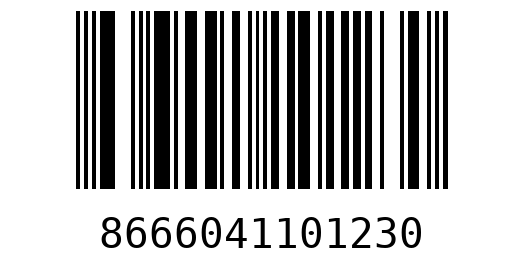

In [20]:
createbarcode(a)[0]

In [10]:

# import EAN13 from barcode module
from barcode import EAN13
  
# import ImageWriter to generate an image file
from barcode.writer import ImageWriter
  
# Make sure to pass the number as string
number = '8666041100000'
  
# Now, let's create an object of EAN13 class and 
# pass the number with the ImageWriter() as the 
# writer
my_code = EAN13(number, writer=ImageWriter())
  
# Our barcode is ready. Let's save it.
my_code.save("new_code1")

'new_code1.png'

In [3]:
sku = "VB0411"
num_list = []
for c in re.findall('[a-zA-Z]+',sku)[0]: num_list.append(str(ord(c)))
str_to_num = "".join(num_list) + "".join(re.findall('[0-9]+',sku))
while len(str_to_num) <13:
    str_to_num = f"{str_to_num}0"
str_to_num

'8666041100000'